# Loksabha Elections 2024

## About The task

The task involves scraping the results of the recently concluded Lok Sabha elections from the Election Commission of India's official website (https://results.eci.gov.in). After collecting the data, the next step is to analyze it and build a comprehensive report highlighting 10 key insights. This analysis should include creating tables and visualizations such as bar graphs and pie charts to effectively communicate the findings.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [21]:
import pandas as pd
file_path = 'C:\\Users\\dell\\OneDrive\\Desktop\\KALVIUM\\Indian General Elections 2024.csv'
election_data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [22]:
election_data['Margin'] = pd.to_numeric(election_data['Margin'], errors='coerce')
election_data_cleaned = election_data.dropna(subset=['Margin'])

## Insights

### Insight 1: Number of seats won by each party

Number of seats won by each party:
Leading Party
Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party  Sharadchandra Pawar              8
Independent                                                   7
Shiv Sena                                                     7
Lok Janshakti Party(Ram Vilas)                                5
Rashtriya Janata Dal                                          4
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                  

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


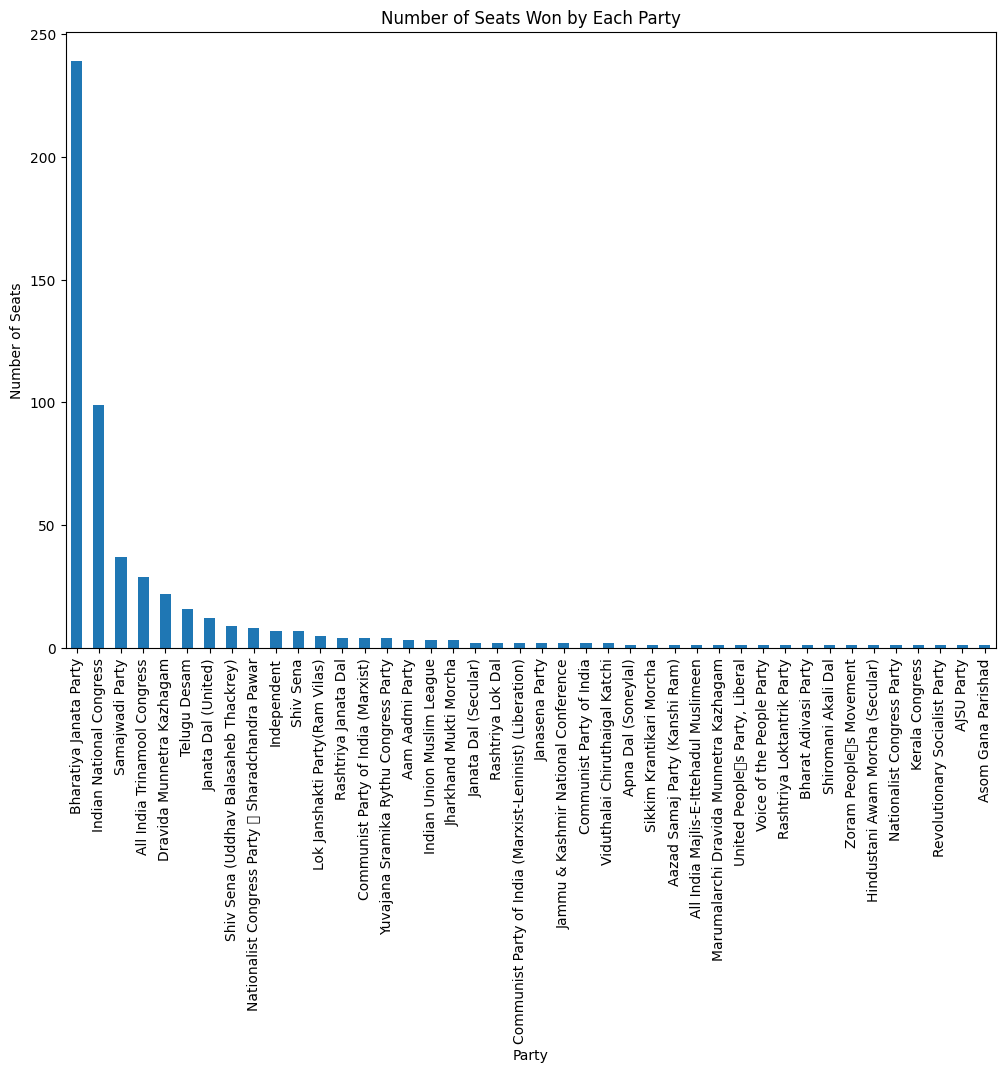

In [23]:
party_seat_count = election_data_cleaned['Leading Party'].value_counts()

# Print the table
print("Number of seats won by each party:")
print(party_seat_count)

# Plot a bar chart
party_seat_count.plot.bar(figsize=(12, 8))
plt.title("Number of Seats Won by Each Party")
plt.xlabel("Party")
plt.ylabel("Number of Seats")
plt.xticks(rotation=90)
plt.show()

### Insight 2:Number of Seats Won in Each State

Number of seats won in each state/UT:
State/UT
Uttar Pradesh                           80
Maharashtra                             48
West Bengal                             42
Bihar                                   40
Tamil Nadu                              39
Madhya Pradesh                          29
Karnataka                               28
Rajasthan                               25
Gujarat                                 25
Andhra Pradesh                          25
Odisha                                  21
Kerala                                  20
Telangana                               17
Jharkhand                               14
Assam                                   14
Punjab                                  13
Chhattisgarh                            11
Haryana                                 10
Delhi                                    7
Jammu and Kashmir                        5
Uttarakhand                              5
Himachal Pradesh                         4
Arunach

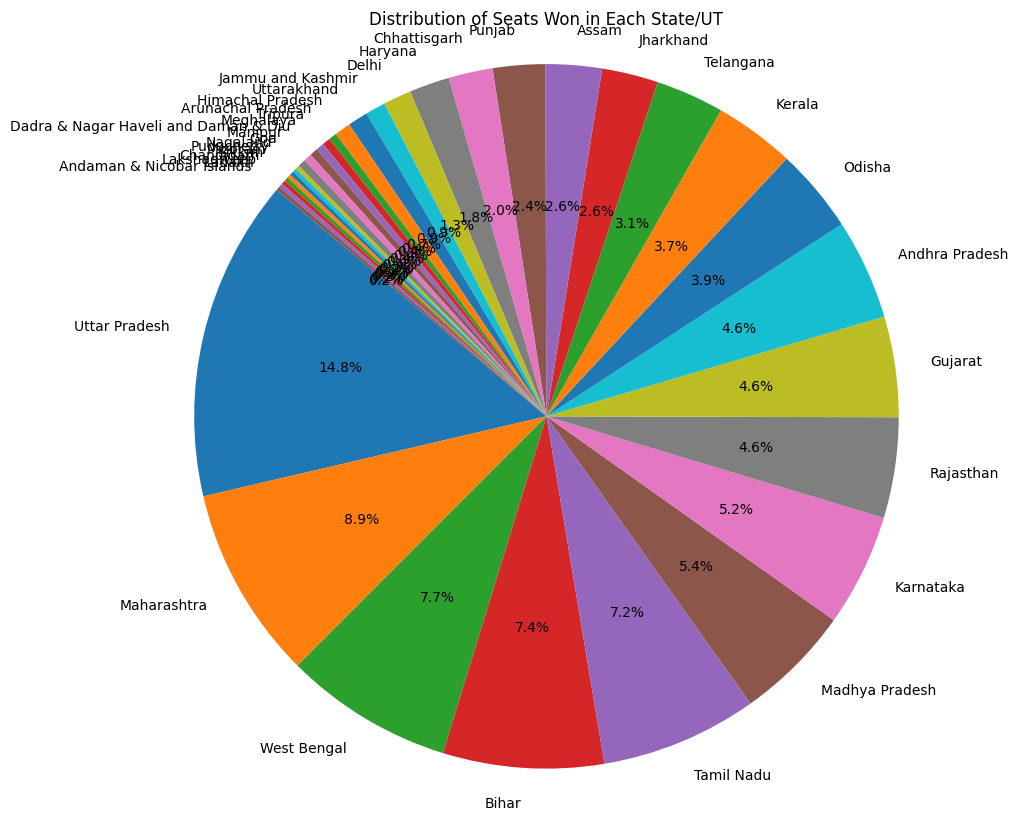

In [24]:
state_seat_count = election_data_cleaned['State/UT'].value_counts()

# Print the table
print("Number of seats won in each state/UT:")
print(state_seat_count)

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(state_seat_count, labels=state_seat_count.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Seats Won in Each State/UT")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Insight 3: Largest victory margin

In [25]:
largest_margin = election_data_cleaned.loc[election_data_cleaned['Margin'].idxmax()]

# Print the table
print("Largest victory margin:")
print(largest_margin)

Largest victory margin:
State/UT                           Madhya Pradesh
Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                  1175092.0
Status                            Result Declared
Name: 218, dtype: object


### Insight 4: Smallest victory margin

In [26]:
smallest_margin = election_data_cleaned.loc[election_data_cleaned['Margin'].idxmin()]

# Print the table
print("Smallest victory margin:")
print(smallest_margin)

Smallest victory margin:
State/UT                                        Maharashtra
Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                 48.0
Status                                      Result Declared
Name: 261, dtype: object


### Insight 5: Number of constituencies where the winning margin is less than 50000 votes


Number of constituencies with margin less than 5000: 115


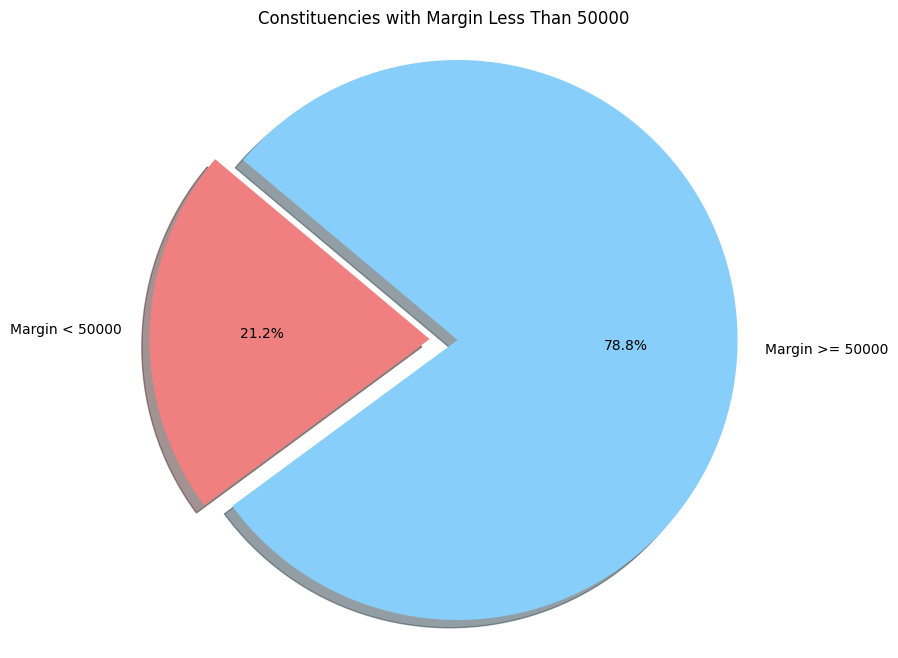

In [27]:
close_races_count = (election_data_cleaned['Margin'] < 50000).sum()
print(f"\nNumber of constituencies with margin less than 5000: {close_races_count}")

# Displaying as a Pie Chart
labels = ['Margin < 50000', 'Margin >= 50000']
sizes = [close_races_count, len(election_data_cleaned) - close_races_count]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Constituencies with Margin Less Than 50000')
plt.show()

### Insight 6: Party with the highest average winning margin

In [28]:
party_avg_margin = election_data_cleaned.groupby('Leading Party')['Margin'].mean()
highest_avg_margin_party = party_avg_margin.idxmax()
highest_avg_margin_value = party_avg_margin.max()

# Print the result
print("Party with the highest average winning margin:")
print(f"{highest_avg_margin_party} with an average margin of {highest_avg_margin_value:.2f}")

Party with the highest average winning margin:
Voice of the People Party with an average margin of 371910.00


### Insight 7: Leading party in each state

In [29]:
leading_party_by_state = election_data_cleaned.groupby('State/UT')['Leading Party'].agg(pd.Series.mode)
print("\nLeading party in each state:\n", leading_party_by_state)



Leading party in each state:
 State/UT
Andaman & Nicobar Islands                                          Bharatiya Janata Party
Andhra Pradesh                                                               Telugu Desam
Arunachal Pradesh                                                  Bharatiya Janata Party
Assam                                                              Bharatiya Janata Party
Bihar                                       [Bharatiya Janata Party, Janata Dal (United)]
Chandigarh                                                       Indian National Congress
Chhattisgarh                                                       Bharatiya Janata Party
Dadra & Nagar Haveli and Daman & Diu                [Bharatiya Janata Party, Independent]
Delhi                                                              Bharatiya Janata Party
Goa                                     [Bharatiya Janata Party, Indian National Congr...
Gujarat                                                     

### Insight 8:States with the highest number of constituencies


States with the highest number of constituencies:
 State/UT
Uttar Pradesh    80
Maharashtra      48
West Bengal      42
Bihar            40
Tamil Nadu       39
Name: count, dtype: int64


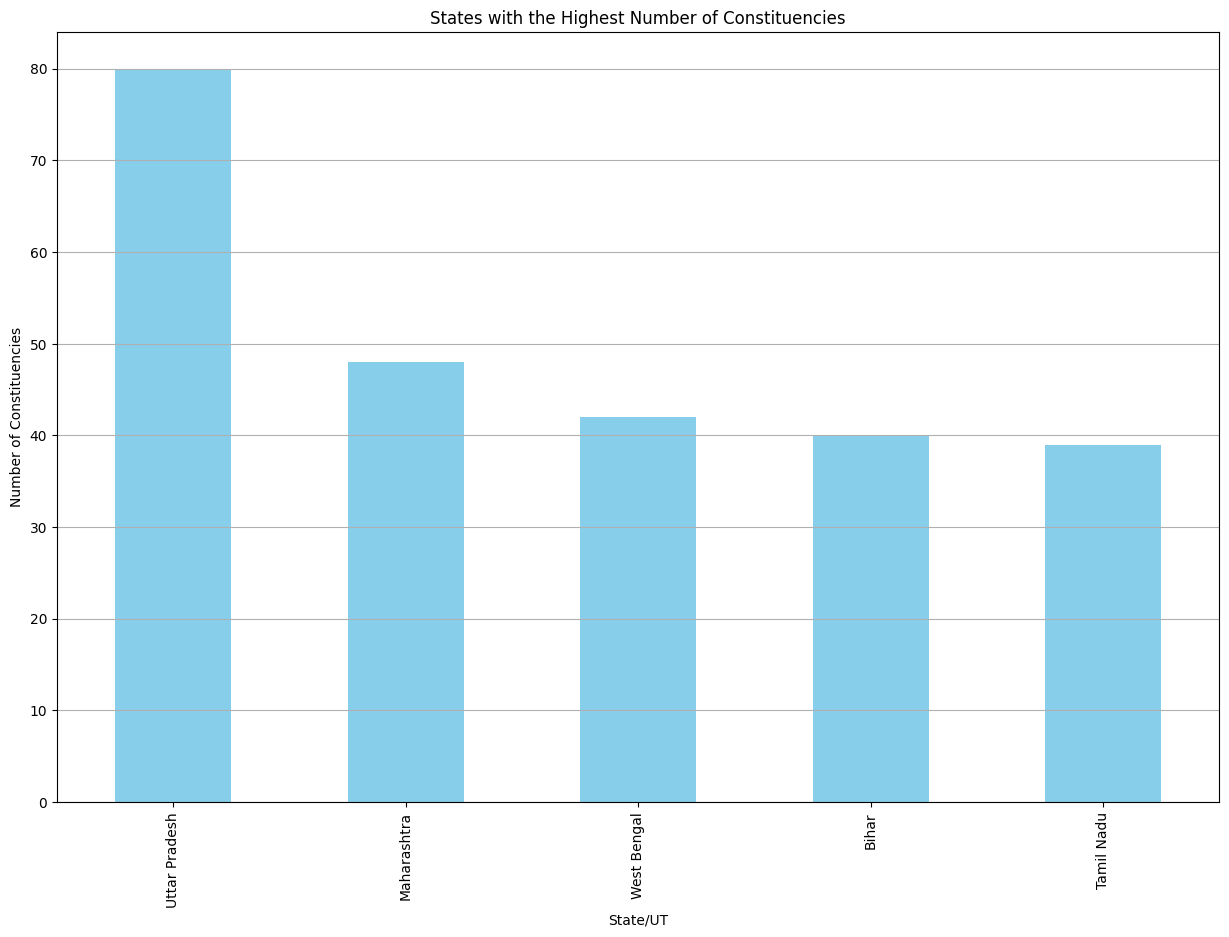

In [30]:
top_states_by_constituencies = election_data_cleaned['State/UT'].value_counts().head(5)
print("\nStates with the highest number of constituencies:\n", top_states_by_constituencies)

plt.figure(figsize=(15, 10))
top_states_by_constituencies.plot(kind='bar', color='skyblue')
plt.title('States with the Highest Number of Constituencies')
plt.xlabel('State/UT')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Insight 9: Average margin of victory for each party

Average margin of victory for each party:
Leading Party
AJSU Party                                                   80880.000000
Aam Aadmi Party                                              75839.000000
Aazad Samaj Party (Kanshi Ram)                              151473.000000
All India Majlis-E-Ittehadul Muslimeen                      338087.000000
All India Trinamool Congress                                169343.551724
Apna Dal (Soneylal)                                          37810.000000
Asom Gana Parishad                                          222351.000000
Bharat Adivasi Party                                        247054.000000
Bharatiya Janata Party                                      192809.774059
Communist Party of India                                    167442.500000
Communist Party of India (Marxist)                          186559.250000
Communist Party of India (Marxist-Leninist) (Liberation)     82833.000000
Dravida Munnetra Kazhagam                               

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


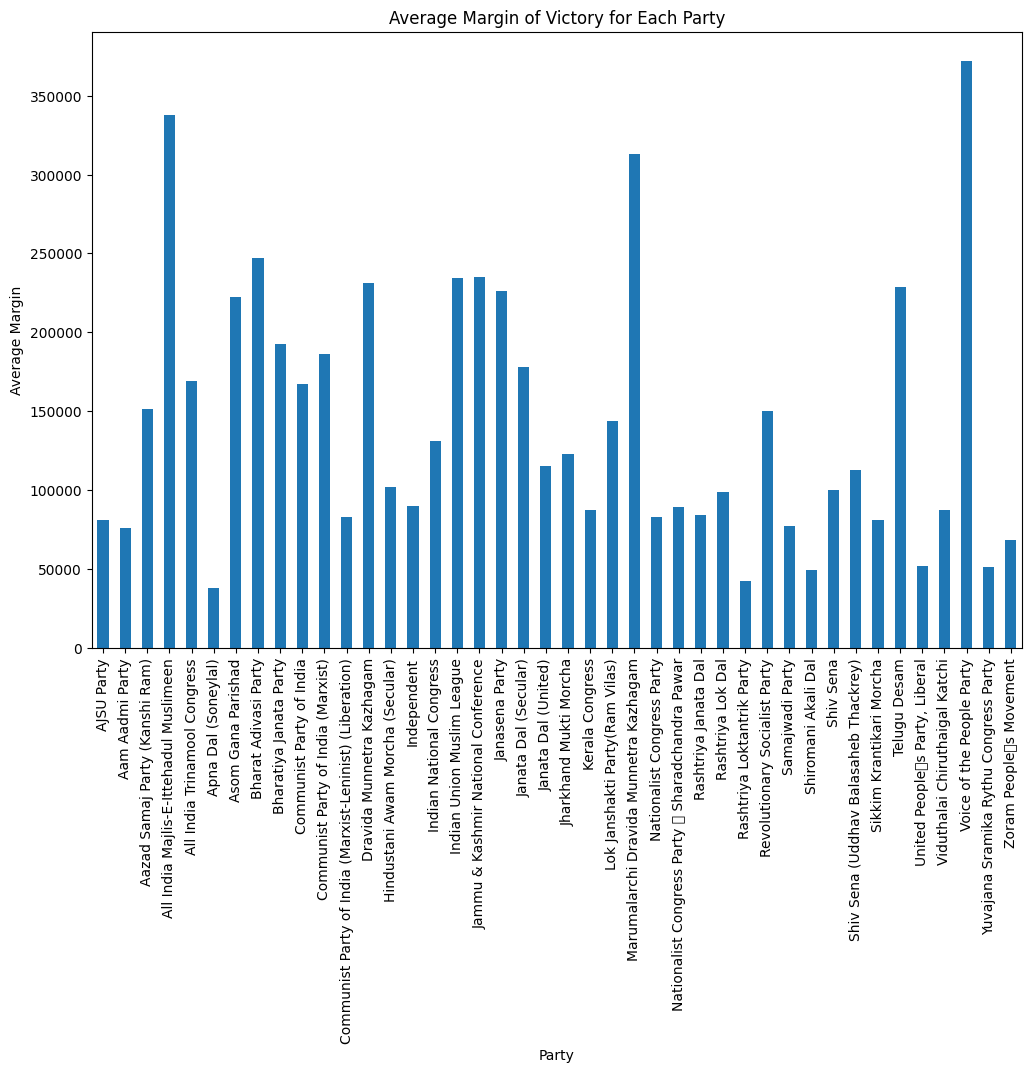

In [31]:
party_avg_margin = election_data_cleaned.groupby('Leading Party')['Margin'].mean()

# Print the table
print("Average margin of victory for each party:")
print(party_avg_margin)

# Plot a bar chart
party_avg_margin.plot.bar(figsize=(12, 8))
plt.title("Average Margin of Victory for Each Party")
plt.xlabel("Party")
plt.ylabel("Average Margin")
plt.xticks(rotation=90)
plt.show()

### Insight 10: Number of States Where a Single Party Won All Seats

In [37]:
single_party_wins = election_data_cleaned.groupby('State/UT')['Leading Party'].nunique()
single_party_win_states = single_party_wins[single_party_wins == 1]

# Count the number of states where a single party won all seats
num_single_party_win_states = single_party_win_states.count()
print(f"\nNumber of states where a single party won all seats: {num_single_party_win_states}")

states_single_party_win = single_party_win_states.index.tolist()
print("\nStates where a single party won all seats:")
for state in states_single_party_win:
    print(state)


Number of states where a single party won all seats: 15

States where a single party won all seats:
Andaman & Nicobar Islands
Arunachal Pradesh
Chandigarh
Delhi
Himachal Pradesh
Ladakh
Lakshadweep
Madhya Pradesh
Manipur
Mizoram
Nagaland
Puducherry
Sikkim
Tripura
Uttarakhand
